In [17]:
import numpy as np

# conv_data = np.genfromtxt('conv_plots.csv', delimiter=',')[1:,:]
# gw_vi_conv_data = np.genfromtxt('gw_vi_conv.txt', delimiter=',')
# names = np.genfromtxt('conv_plots.csv', delimiter=',', dtype=str)[0,:]

gw_mcts_data = np.loadtxt('data/gw_output_allExplorationTermHistory.txt', delimiter='], [', dtype = str)




# g2048_mcts_data = np.genfromtxt('data/g2048_output.txt', delimiter=',')
# pyl_mcts_data = np.genfromtxt('data/pyl_output.txt', delimiter=',')


In [21]:
gw_mcts_data[3]

'0.28, 0.28, 0.28, 0.28'

'\nfig, ax = plt.subplots(figsize=(9, 2))\nax.plot(g2048_mcts_data[2:], label="UCT Exploration Term")\nplt.title("Converge of Exploration Terms on Game 2048")\nplt.ylabel(\'Exploration Term\')\nplt.xlabel(\'Iterations\')\nlegend = ax.legend(loc=\'best\', shadow=True, fontsize=\'x-large\')\n\nfig, ax = plt.subplots(figsize=(9, 2))\nax.plot(pyl_mcts_data[2:], label="UCT Exploration Term")\nplt.title("Converge of Exploration Terms on Push Your Luck (PYL)")\nplt.ylabel(\'Exploration Term\')\nplt.xlabel(\'Iterations\')\nlegend = ax.legend(loc=\'best\', shadow=True, fontsize=\'x-large\')\n\n'

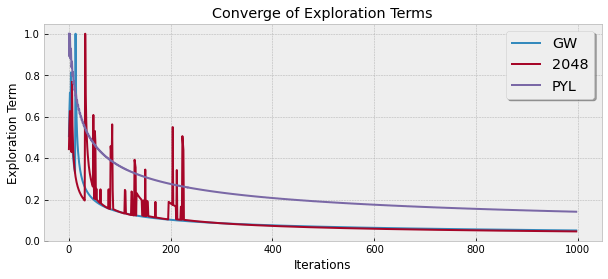

In [7]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.style.use('bmh')

fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(gw_mcts_data[2:]/max(gw_mcts_data[2:]), label="GW")
ax.plot(g2048_mcts_data[2:]/max(g2048_mcts_data[2:]), label="2048")
ax.plot(pyl_mcts_data[2:]/max(pyl_mcts_data[2:]), label="PYL")

plt.title("Converge of Exploration Terms")
plt.ylabel('Exploration Term')
plt.xlabel('Iterations')
legend = ax.legend(loc='best', shadow=True, fontsize='x-large')


'''
fig, ax = plt.subplots(figsize=(9, 2))
ax.plot(g2048_mcts_data[2:], label="UCT Exploration Term")
plt.title("Converge of Exploration Terms on Game 2048")
plt.ylabel('Exploration Term')
plt.xlabel('Iterations')
legend = ax.legend(loc='best', shadow=True, fontsize='x-large')

fig, ax = plt.subplots(figsize=(9, 2))
ax.plot(pyl_mcts_data[2:], label="UCT Exploration Term")
plt.title("Converge of Exploration Terms on Push Your Luck (PYL)")
plt.ylabel('Exploration Term')
plt.xlabel('Iterations')
legend = ax.legend(loc='best', shadow=True, fontsize='x-large')

'''

In [33]:
import matplotlib.pyplot as plt
plt.style.use('bmh')

fig, ax = plt.subplots()

ax.plot(conv_data[:,0], label=names[0])
ax.plot(conv_data[:,1], label=names[1])
ax.plot(conv_data[:,2], label=names[2])

plt.title("Converge of Exploration Terms on various MDP's")
plt.ylabel('Exploration Term')
plt.xlabel('Iterations')

legend = ax.legend(loc='best', shadow=True, fontsize='x-large')


NameError: name 'conv_data' is not defined

In [ ]:
# This minimization is based on min UCT, in gridworld it is possible for this jump to another minimized UCT, but overall the games converge.


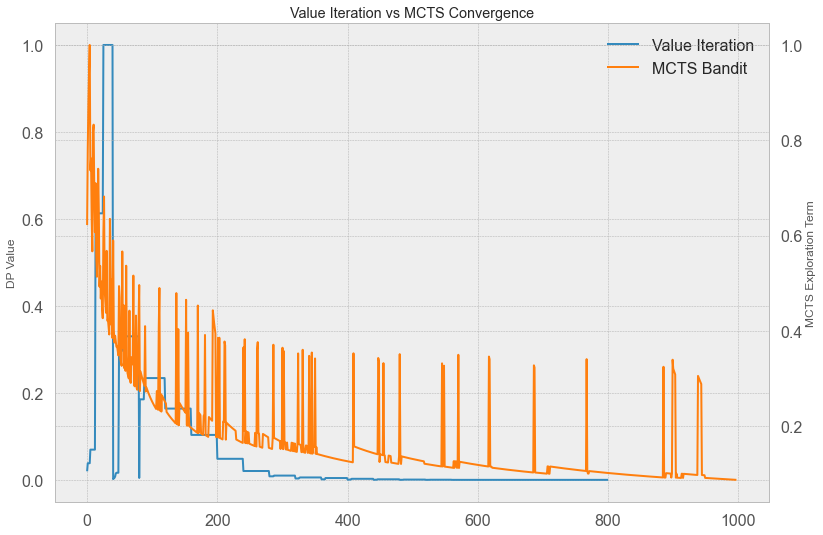

In [150]:



fig, ax = plt.subplots()

ax.plot(gw_vi_conv_data/np.max(gw_vi_conv_data), label="Value Iteration")
ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

ax2.plot(conv_data[:,2]/np.max(conv_data[:,2]), color = 'tab:orange'
, label="MCTS Bandit")


plt.title("Value Iteration vs MCTS Convergence")
ax.set_ylabel('DP Value')
ax2.set_ylabel('MCTS Exploration Term')


# Cross labelling
lines_1, labels_1 = ax.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

lines = lines_1 + lines_2
labels = labels_1 + labels_2

ax.legend(lines, labels, loc=0)
# ax.xlabel('Iterations')


# legend = plt.legend(loc='best', shadow=True, fontsize='x-large')

In [107]:

mcts_conv_diff = np.diff(conv_data[:,2])/np.max(np.diff(conv_data[:,2]))
vi_conv_diff = np.diff(gw_vi_conv_data)/np.max(np.diff(gw_vi_conv_data))

early_stopping_thresh = 0.00000037
early_stop_mcts = np.where((conv_diff < early_stopping_thresh) & (conv_diff > 0))
early_stop_vi = np.where((vi_conv_diff < early_stopping_thresh) & (vi_conv_diff > 0))


In [108]:
early_stop_vi[0][0]

522

In [ ]:
# Both VI and MCTS Bandit converge to minimum when running the respective algorithms. VI tends to converge sooner, nevertheless MCTS will use less computing resources to arrive at a solution. Value Iteration Complexity, vs MCTS Complexity